<a href="https://colab.research.google.com/github/sudarshansb143/Data-Pipelines/blob/master/titanic_using_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df =pd.read_csv("titanic_data.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.head()
y = df.Survived

In [ ]:
df.shape

(891, 12)

In [ ]:
df.drop(columns= ["Name", "Ticket", "Cabin"], inplace = True )

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.drop("PassengerId", axis = 1, inplace = True)

In [ ]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
df.Sex.replace({"male": 1, "female" : 0}, inplace = True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
df.Age = df.Age.fillna(df.Age.median())

In [ ]:
df.Embarked.fillna("S", inplace = True)

In [ ]:
df.isna().sum()
df = pd.get_dummies(df, drop_first = True)

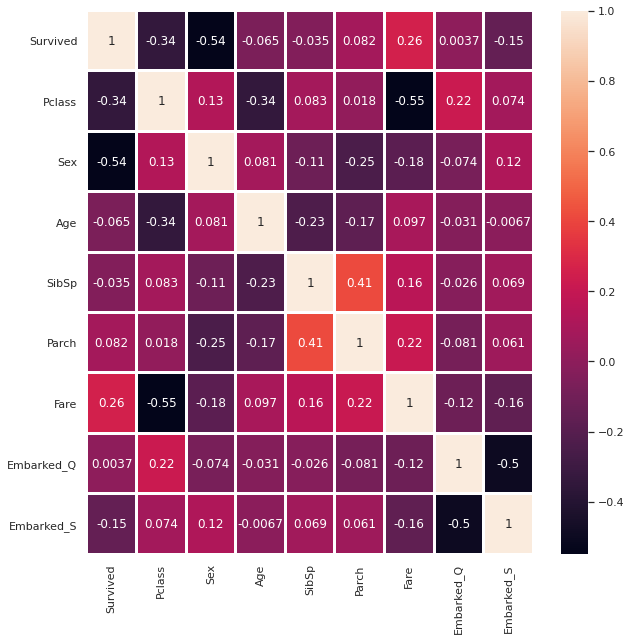

In [ ]:
import seaborn as sns
sns.set()
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, linewidths = 2)
plt.show()

In [ ]:
df = df[["Pclass", "Sex", "Fare", "Embarked_Q"]]

In [ ]:
df.head()

,Pclass,Sex,Fare,Embarked_Q
0,3,1,7.2500,0
1,1,0,71.2833,0
2,3,0,7.9250,0
3,1,0,53.1000,0
4,3,1,8.0500,0


In [ ]:
df.head()

,Pclass,Sex,Fare,Embarked_Q
0,3,1,7.2500,0
1,1,0,71.2833,0
2,3,0,7.9250,0
3,1,0,53.1000,0
4,3,1,8.0500,0


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (df, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
# Fitting the default Logistic Regression
lr = LogisticRegression()

In [ ]:
lr.fit(X_train_scale, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_test_scale)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       110
           1       0.72      0.67      0.69        69

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[92 18]
 [23 46]]


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr, X_train_scale, y_train, cv=5)
print(score)

[0.76223776 0.76923077 0.78873239 0.80985915 0.78873239]


In [ ]:
# Tuning model
param = {
  'C': [0.001, 0.01, 0.1,  1, 10, 100]
}

from sklearn.model_selection import GridSearchCV
gsc = GridSearchCV(lr, param, cv=5)

gsc.fit(X_train_scale, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gsc.best_params_

{'C': 0.01}

In [ ]:
round(gsc.best_score_ * 100, 2)

78.66

In [ ]:
print("Training Score", lr.score(X_train_scale, y_train))

Training Score 0.7837078651685393


In [ ]:
print("Testing Score", lr.score(X_test_scale, y_test))

Testing Score 0.770949720670391


In [ ]:
# Reviewing data

In [ ]:
num_col = df.drop("Embarked_Q", axis=1)

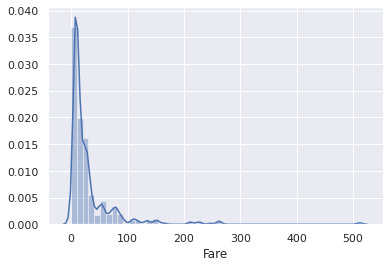

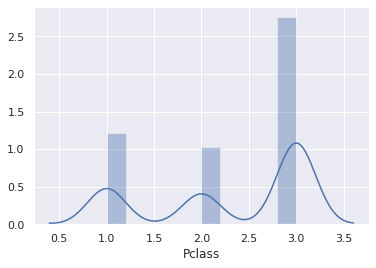

In [ ]:
num_col = df[["Fare", "Pclass"]]
for i in num_col.columns.to_list():
  sns.set()
  sns.distplot(num_col[i])
  plt.show()

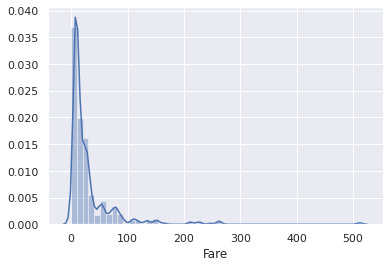

In [130]:
sns.distplot(df.Fare)

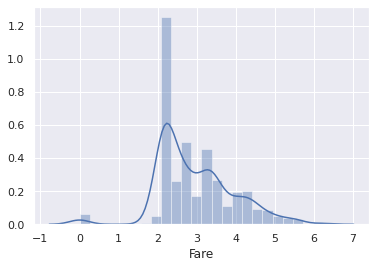

In [132]:
temp = np.log1p(df.Fare)
sns.distplot(temp)